<a href="https://colab.research.google.com/github/amansingh88688/stock-price-predictor/blob/main/stock_market_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import datetime
import yfinance as yfin
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.utils import Sequence
from keras.layers import Dense, LSTM

In [97]:
yfin.pdr_override()
df = pdr.get_data_yahoo('AAPL', start='2013-01-01', end='2019-12-30')
df


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,19.779285,19.821428,19.343929,19.608213,16.813862,560518000
2013-01-03,19.567142,19.631071,19.321428,19.360714,16.601622,352965200
2013-01-04,19.177500,19.236786,18.779642,18.821428,16.139193,594333600
2013-01-07,18.642857,18.903570,18.400000,18.710714,16.044266,484156400
2013-01-08,18.900356,18.996071,18.616072,18.761070,16.087444,458707200
...,...,...,...,...,...,...
2019-12-20,70.557503,70.662498,69.639999,69.860001,68.241539,275978000
2019-12-23,70.132500,71.062500,70.092499,71.000000,69.355141,98572000
2019-12-24,71.172501,71.222504,70.730003,71.067497,69.421074,48478800


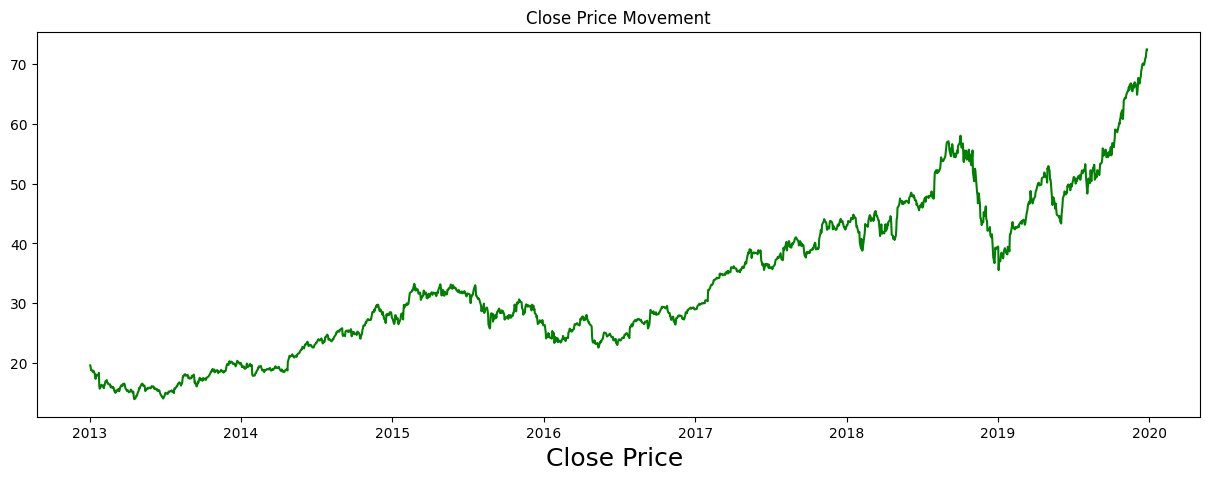

In [98]:
plt.figure(figsize=(15,5))
plt.title('Close Price Movement')
plt.plot(df['Close'], color='green')
plt.xlabel('Date', fontsize=18)
plt.xlabel('Close Price ', fontsize=18)
plt.show()

In [99]:
data = df.filter(['Close'])
dataset = data.values
len(dataset)

1760

In [100]:
training_data_size = math.ceil(len(dataset)*0.7)

training_data_size

1232

In [101]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.09671473],
       [0.09248614],
       [0.08327231],
       ...,
       [0.97590973],
       [1.        ],
       [0.99953009]])

In [102]:
train_data = scaled_data[0:training_data_size, :]
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i,0])
  if i<=61:
    print(x_train)
    print(y_train)

[array([0.09671473, 0.09248614, 0.08327231, 0.08138073, 0.08224107,
       0.07723146, 0.08114277, 0.07918407, 0.06786508, 0.05820581,
       0.07051327, 0.06843253, 0.06679725, 0.06970784, 0.07534597,
       0.03659297, 0.03011276, 0.03618413, 0.0413341 , 0.04045544,
       0.03963779, 0.03849673, 0.03160162, 0.04107174, 0.04077275,
       0.04740548, 0.05153035, 0.05455076, 0.04721022, 0.04666715,
       0.04641088, 0.04248737, 0.04238361, 0.03558615, 0.03388371,
       0.03678211, 0.03189452, 0.03565937, 0.03297453, 0.03104025,
       0.0243709 , 0.01801275, 0.02477971, 0.02143589, 0.02443801,
       0.02513363, 0.02888628, 0.0231261 , 0.02307729, 0.02560958,
       0.03241927, 0.03977814, 0.03902762, 0.03755704, 0.03795366,
       0.0435552 , 0.04457421, 0.04308535, 0.03755704, 0.03180909])]
[0.02341900173486275]
[array([0.09671473, 0.09248614, 0.08327231, 0.08138073, 0.08224107,
       0.07723146, 0.08114277, 0.07918407, 0.06786508, 0.05820581,
       0.07051327, 0.06843253, 0.066

In [103]:
x_train, Y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


x_train.shape

(1172, 60, 1)

# Model

In [104]:
model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [105]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [106]:
model.fit(x_train, Y_train, batch_size=1, epochs=1)

1172/1172 [==============================] - 32s 24ms/step - loss: 6.2974e-04


In [107]:
test_data = scaled_data[training_data_size - 60: ,:]
x_test = []
y_test = dataset[training_data_size:, :]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [108]:
x_test = np.array(x_test)

In [109]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [110]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


17/17 [==============================] - 1s 13ms/step


In [112]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
print(rmse)

1.988183187715935


<ipython-input-114-d0f62fa49319>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions'] = predictions


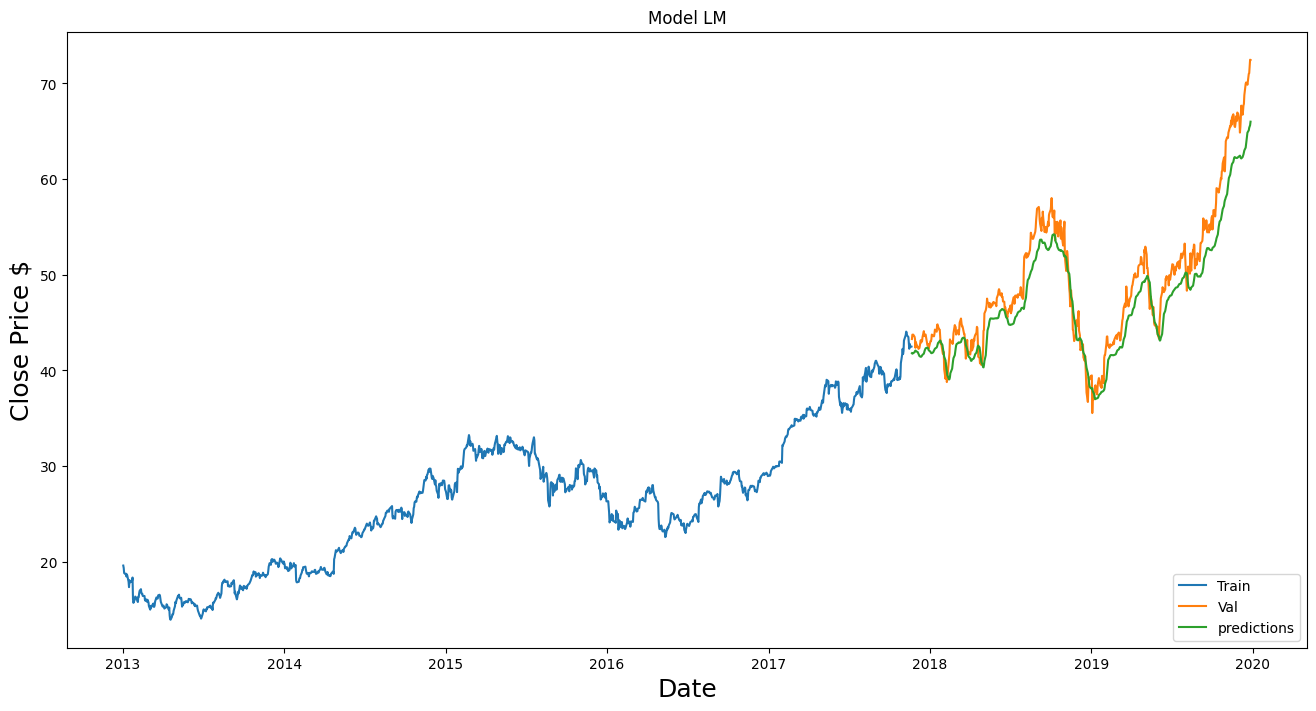

In [114]:
train = data[:training_data_size]
valid = data[training_data_size:]
valid['predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model LM')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price $', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'predictions']])
plt.legend(['Train', 'Val', 'predictions'], loc='lower right')
plt.show()